In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
import re
from nltk.corpus import stopwords
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df=pd.read_csv("/flipkart.csv")
df.head()


,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [ ]:
df.isnull().sum()

review    0
rating    0
dtype: int64

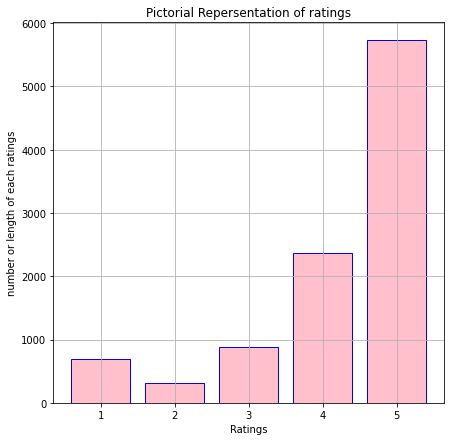

In [ ]:
plt.figure(figsize = (7,7))
ratings = ['1','2','3', '4', '5']
numRatings = [len(df[df['rating'] == 1 ]),
             len(df[df['rating'] == 2 ]),
             len(df[df['rating'] == 3 ]),
             len(df[df['rating'] == 4 ]),
             len(df[df['rating'] == 5 ])
             ]
plt.title('Pictorial Repersentation of ratings')
plt.grid(True)
plt.rcParams['font.size'] = '10'
plt.bar(ratings, numRatings, align='center', color='pink', edgecolor='blue',capsize=10)
plt.xlabel('Ratings')
plt.ylabel('number or length of each ratings')
plt.show()

In [ ]:
print(0, df['review'].values[0])
print(1, df['review'].values[1])
print(2, df['review'].values[2])
print(3, df['review'].values[3])
print(4, df['review'].values[4])

0 It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE
1 awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE
2 awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE
3 I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is pretty 

In [ ]:
'''The data cleaning of the review column is done with the use of the regular expression, stemming, and stopwords. 
Here, stemmar is simply stemming, which converts the words into their root form. 
To put simple stemming reduces a word into its base form in a way that similar words lie under the same roof, which helps s algorithm understand the text data better (for example, swim, swims, and swimming is reduced to swim, here, the word swim is the root form). SnowballStemmar is a stemming algorithm that works on top of Porter Stemmar. 
And the use of the regular expression is used to check whether a string contains a specific search pattern.'''
stemmer = nltk.SnowballStemmer("english")
stopwords=list(set(stopwords.words('english')))


In [ ]:
def pre_process(sentance):
  sent=str(sentance).lower()
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F"  # emoticons
  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
  u"\U0001F680-\U0001F6FF"  # transport & map symbols
  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      "]+", flags=re.UNICODE)
  sent = emoji_pattern.sub(r'', sent)
  sent = [stemmer.stem(word) for word in sent.split(' ')]
  sent=" ".join(sent)
  sent=[word for word in sent.split(' ') if word not in stopwords]
  sent=" ".join(sent)
  return sent

In [ ]:
df["review"] = df["review"].apply(pre_process)
df["review"]

0       nice produt design lot easi carri look stylish...
1       awesom sound veri pretti see nd sound qualiti ...
2       awesom sound qualiti pros 7 8 hrs batteri life...
3       think good product per qualiti design quit goo...
4       awesom bass sound qualiti veri good bettari lo...
                              ...                        
9971                                             goodread
9972                everyth amazimg built veri light read
9973                                             goodread
9974                               best headphon use read
9975                                             niceread
Name: review, Length: 9976, dtype: object

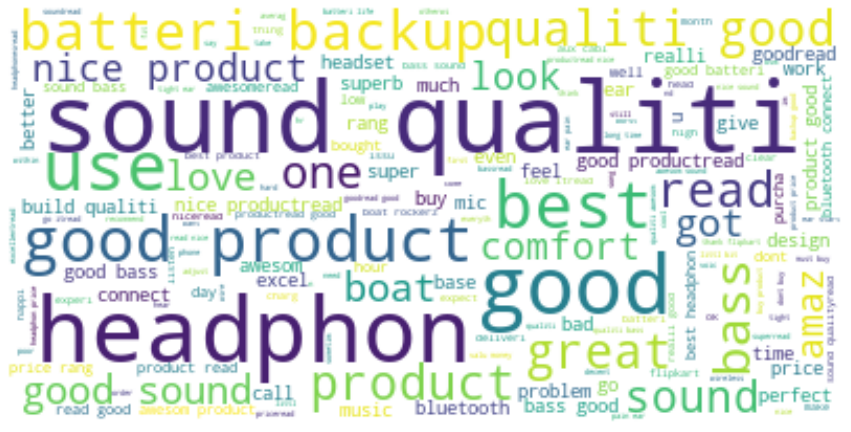

In [ ]:
text = " ".join(i for i in df.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text = ['For some, emoji have caused frustration for users (how the heck are you supposed to use the 🙃 emoji?',
        '(how the heck are you supposed to use the 🙃 emoji?']
pre_process(text)

' emoji caus frustrat user heck suppos use emoji heck suppos use emoji '

In [ ]:
sent = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
com = []
def update(k):
    neg.append(k["neg"])    
    pos.append(k["pos"])
    neu.append(k["neu"])
    com.append(k["compound"])

for i in tqdm(df['review']):
    update(sent.polarity_scores(i))

df["negative"] = neg
df["neutral"] = neu 
df["positive"] = pos  
df["compound"] = com
df.head()

100%|██████████| 9976/9976 [00:01<00:00, 5758.85it/s]


,review,rating,negative,neutral,positive,compound
0,nice produt like design lot easi carri look...,5,0.00,0.569,0.431,0.6486
1,awesom soundveri pretti see nd sound qualiti g...,5,0.00,0.529,0.471,0.8689
2,awesom sound qualiti pros hrs batteri life in...,4,0.00,0.806,0.194,0.8625
3,think good product per qualiti also design qui...,5,0.05,0.548,0.401,0.9325
4,awesom bass sound qualiti good bettari long li...,5,0.00,0.740,0.260,0.5523


In [ ]:
c=sum(df['neutral'])
a=sum(df['positive'])
b=sum(df['negative'])
d=sum(df['compound'])
def score(a, b, c):
    if (a>b) and (a>c):
        print("Positive smile ")
    elif (b>a) and (b>c):
        print("Negative angry ")
    else:
        print("Neutral fine")
score(a, b, c)

Neutral fine


In [ ]:
print("Positive",a)
print("Negative",b)
print("Neutral",c)
print("compound",d)

Positive 3131.819000000082
Negative 375.4350000000002
Neutral 6468.704999999995
compound 3491.3209999998567
